# Module 11 -- Decision Trees & Random Forests
### Group Members: Gege Li, Zhihong Zhang, Zhijing Zhang

## Introduction




In this module, we are given a mushroom data set from the UCI repository and used given attributes to predict veil color of given observation. After the basic EDA and data preparation work, we are going to apply decision trees and random forest models to the dataset and evaluate their performance. Decision tree and random forest models will be designed for purposes of predicting which of the four veil-color values is most likely to apply to a given observation. Finally, we will identify the preferred model and get a conclusion.

## Exploratory Data Analysis

First of all load the library and read the dataset from GitHub.

In [64]:
#prepared library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# check and read the dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/M11_Data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d


In this assignment, our response variable would be __veil-color__.

Firstly, we need to rename the columns.

In [66]:
df.rename(columns={0: 'edibility', 
         1: 'shape', 2: 'surface',3: 'color', 4: 'bruises',5: 'odor', 
         6: 'gill_attach', 7: 'gill_spacing',8: 'gill_size',9: 'gill_color', 
         10: 'stalk_shape', 11: 'stalk_root', 12: 'stalk_surface_above', 13: 'stalk_surface_below', 
         14: 'stalk_color_above', 15: 'stalk_color_below',
         16: 'veil_type', 17: 'veil_color',18: 'ring_number', 19: 'ring_type',
         20: 'spore_print', 21: 'population', 22: 'habitat'},inplace = True) 
df.head()

,edibility,shape,surface,color,bruises,odor,gill_attach,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above,stalk_surface_below,stalk_color_above,stalk_color_below,veil_type,veil_color,ring_number,ring_type,spore_print,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   edibility            8124 non-null   object
 1   shape                8124 non-null   object
 2   surface              8124 non-null   object
 3   color                8124 non-null   object
 4   bruises              8124 non-null   object
 5   odor                 8124 non-null   object
 6   gill_attach          8124 non-null   object
 7   gill_spacing         8124 non-null   object
 8   gill_size            8124 non-null   object
 9   gill_color           8124 non-null   object
 10  stalk_shape          8124 non-null   object
 11  stalk_root           8124 non-null   object
 12  stalk_surface_above  8124 non-null   object
 13  stalk_surface_below  8124 non-null   object
 14  stalk_color_above    8124 non-null   object
 15  stalk_color_below    8124 non-null   object
 16  veil_t

We can tell all the attributes are categorical variables.

Also, we can tell there is no null value.

In [ ]:
#check null value
df.isnull().sum()

edibility              0
shape                  0
surface                0
color                  0
bruises                0
odor                   0
gill_attach            0
gill_spacing           0
gill_size              0
gill_color             0
stalk_shape            0
stalk_root             0
stalk_surface_above    0
stalk_surface_below    0
stalk_color_above      0
stalk_color_below      0
veil_type              0
veil_color             0
ring_number            0
ring_type              0
spore_print            0
population             0
habitat                0
dtype: int64

There is no missing value in this dataset.

Then, check the __response variable__.

In [ ]:
df.veil_color.value_counts()
# brown=n,orange=o,white=w,yellow=y

w    7924
n      96
o      96
y       8
Name: veil_color, dtype: int64

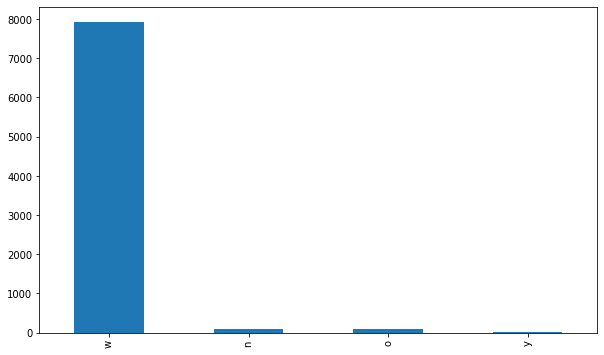

In [ ]:
df['veil_color'].value_counts().plot.bar(figsize=(10,6))

Based on the histogram, we can tell that it is quite imbalanced in veil color based on the population, and w, which represent white color, dominates the whole population of the asttributes. Later we also need to apply SMOOTE for modeling. 

Then, draw some catplots to help us to understand
the nature of __each of the variables__ (including the response variable).

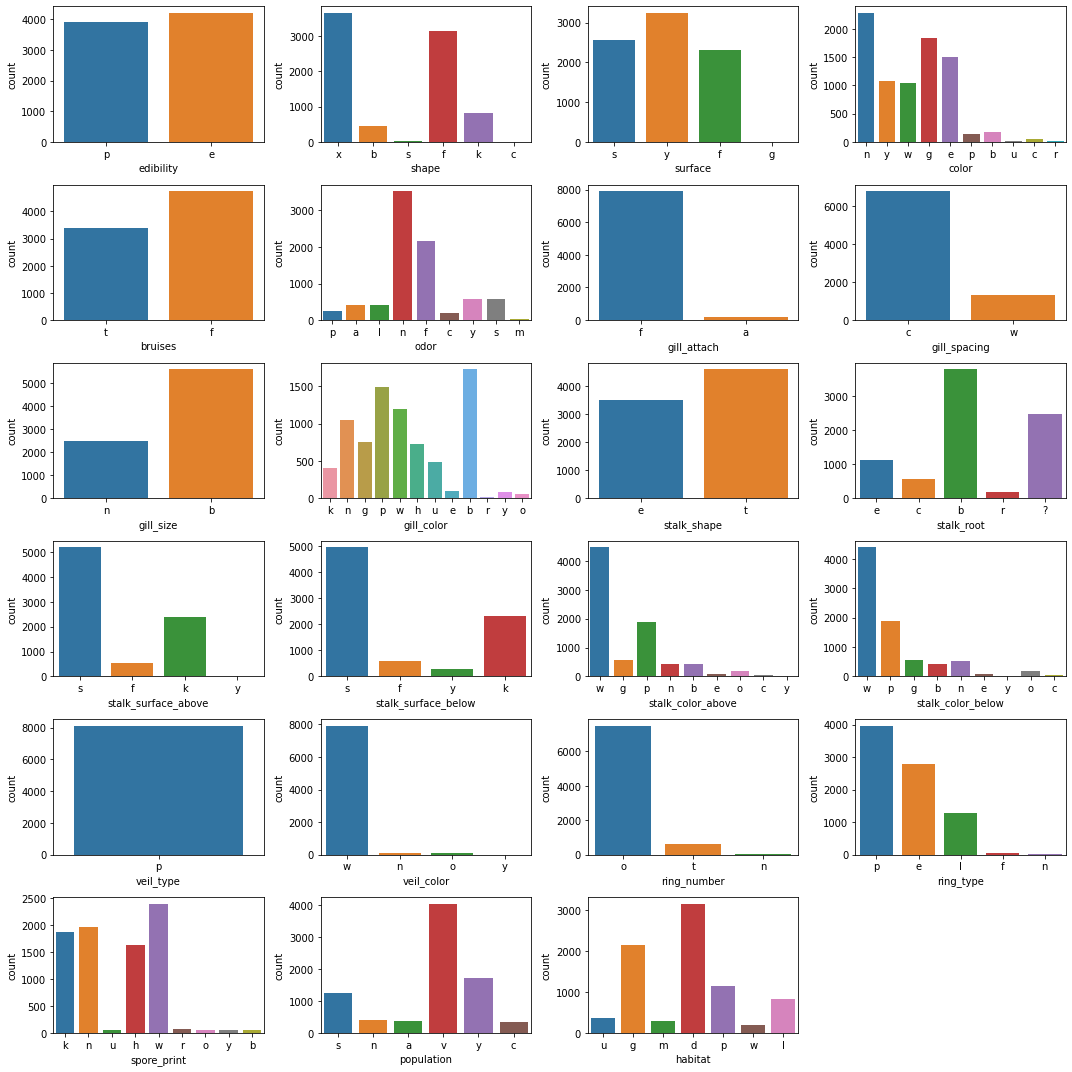

In [ ]:
#plot all the categorical data
fig, axes =plt.subplots(6,4, figsize=(15,15)) #, sharex=True
axes = axes.flatten()

#remove last plot
axes.flat[-1].set_visible(False)

object_bol = df.dtypes == 'object'

for ax, catplot in zip(axes, df.dtypes[object_bol].index):
    sns.countplot(x=catplot, data=df, ax=ax)

plt.tight_layout()  
#show the plot
plt.show()

Base on these plots, we can find these findings

- Many attributes has imbalanced population spread. For example, our target attribute, veil color, has a quite imbalanced distribution and white dominates the who selections. 

- veil type  attribute has only one value. It is not a useful explantory attribute. 

- For the cap surface, g,which represent grooves, has almost no count.

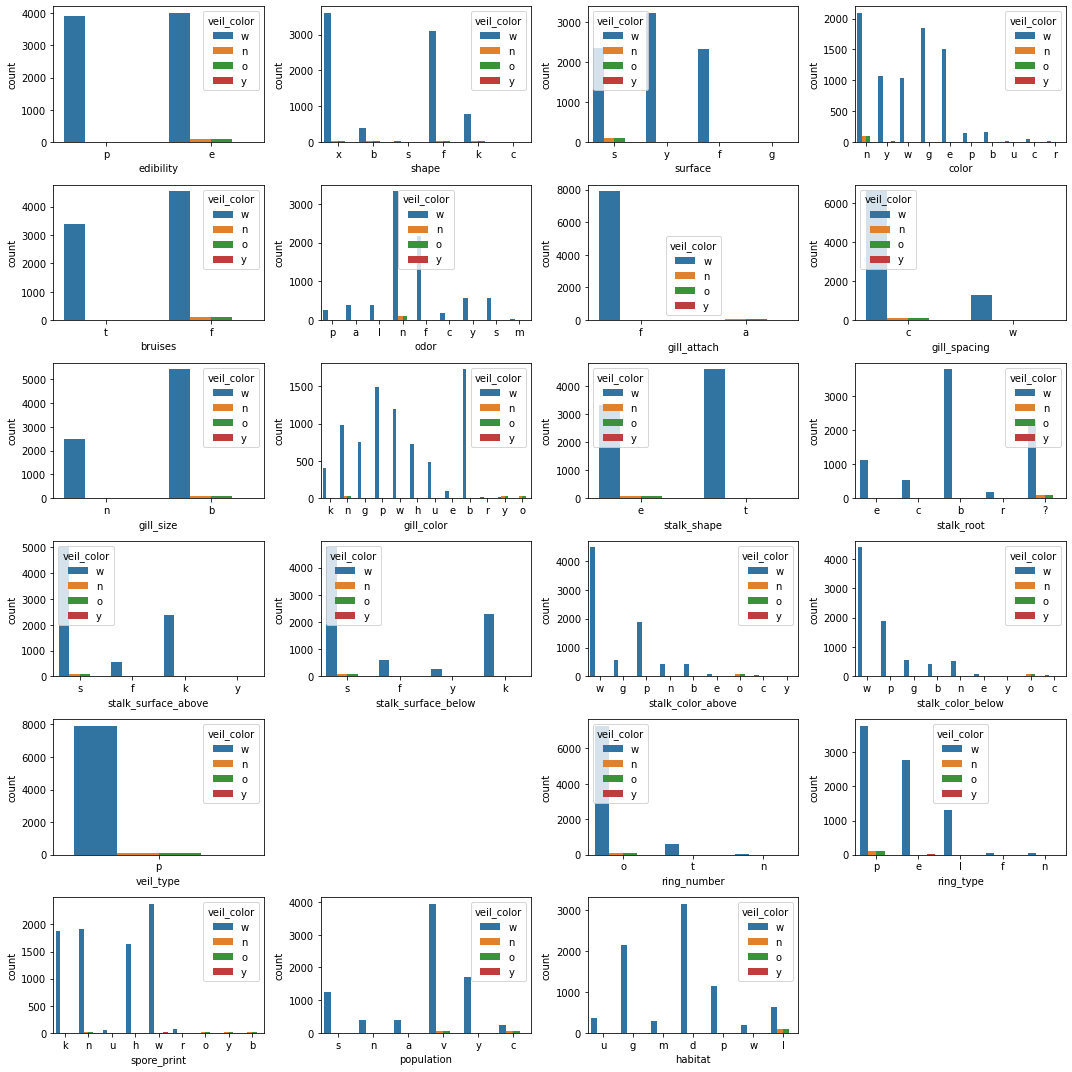

In [ ]:
#plot all the categorical data as veil color

fig, axes =plt.subplots(6,4, figsize=(15,15)) #, sharex=True
axes = axes.flatten()

# remove last one empty plot
axes.flat[-1].set_visible(False)
# remove nonsense veil vs veil color
axes.flat[-7].set_visible(False)

object_bol = df.dtypes == 'object'

for ax, catplot in zip(axes, df.dtypes[object_bol].index):
    sns.countplot(x=catplot,hue='veil_color', data=df, ax=ax)

plt.tight_layout()  
plt.show()

Through this diagram, we have these findings and insights.

- For certain attributes, such as habitat , except on grass, almost all veil color are white. It is very helpful on predicting veil color if we 


- For gill size, the narrow one only has white color. 
Similarly, bruises and edibility have the same issues. 

- There are many of imbalanced features showed on the response variable of attributes. 

- yellow veil color only showed in color,spore print and ring type attributes.


When we combined two graphs, some possible good explantory attributes based on distribution spread are as follows:

- edibility: it seems that all poinsous mushroom has white veil type. 
- stalk-surface-above and stalk-surface-below: We can see two distributions are very similar and mainly most veil color distributes at smooth feature. White veil color appears in all explantory variable values. 

- gill size: brown and orange veil color only show in broad

- bruises : brown and orange veil color only show in broad

- ring number: almost only white veil color shows at two or none. Brown and orange color appear at one ring number.

- habitat : all of brown ,orange, and white appear at leaves. All other habitats seems to be white exclusively. Given habitat can help to identify the veil color. 


Through this analysis, we may want to have a closer look at these attributes.

In [ ]:
#check the number of each veil color in edibility
pd.crosstab(df.veil_color, df.edibility, margins=True)

edibility,e,p,All
veil_color,,,
n,96,0,96
o,96,0,96
w,4016,3908,7924
y,0,8,8
All,4208,3916,8124


In [ ]:
#check the number of each veil color in stalk_surface_above
pd.crosstab(df.veil_color, df.stalk_surface_above, margins=True)

stalk_surface_above,f,k,s,y,All
veil_color,,,,,
n,0,0,96,0,96
o,0,0,96,0,96
w,552,2372,4984,16,7924
y,0,0,0,8,8
All,552,2372,5176,24,8124


In [ ]:
#check the number of each veil color in stalk_surface_below
pd.crosstab(df.veil_color, df.stalk_surface_below, margins=True)

stalk_surface_below,f,k,s,y,All
veil_color,,,,,
n,0,0,96,0,96
o,0,0,96,0,96
w,600,2304,4744,276,7924
y,0,0,0,8,8
All,600,2304,4936,284,8124


In [ ]:
#check the number of each veil color in gill size:
pd.crosstab(df.veil_color, df.gill_size, margins=True)

gill_size,b,n,All
veil_color,,,
n,96,0,96
o,96,0,96
w,5420,2504,7924
y,0,8,8
All,5612,2512,8124


In [ ]:
#check the number of each veil color in bruises 
pd.crosstab(df.veil_color, df.bruises, margins=True)

bruises,f,t,All
veil_color,,,
n,96,0,96
o,96,0,96
w,4548,3376,7924
y,8,0,8
All,4748,3376,8124


In [ ]:
#check the number of each veil color in ring number 
pd.crosstab(df.veil_color, df.ring_number, margins=True)

ring_number,n,o,t,All
veil_color,,,,
n,0,96,0,96
o,0,96,0,96
w,36,7288,600,7924
y,0,8,0,8
All,36,7488,600,8124


In [ ]:
#check the number of each veil color in habitat 
pd.crosstab(df.veil_color, df.habitat, margins=True)

habitat,d,g,l,m,p,u,w,All
veil_color,,,,,,,,
n,0,0,96,0,0,0,0,96
o,0,0,96,0,0,0,0,96
w,3148,2148,632,292,1144,368,192,7924
y,0,0,8,0,0,0,0,8
All,3148,2148,832,292,1144,368,192,8124


After check the detail in these table, we can tell that the features we select make sense. Later we will use these seven features to constrct modle. Now we can do the further analysis.

## Data Preparation & Prepped Data Review

Based on our EDA finding, we need to do these __data preparation__ process as follows:

- Drop useless feature column--- veil type
- All variables are categorical, we need to do the data transformation to change it into numerical data.
- There are many imbalanced patterns which we can digger deeper on selected features. We will resample the imbalance data later in modeling part.

In [67]:
df2 = df.copy()

Firstly, we need to delete veil type because this attribute has only one value.

In [68]:
# drop 'veil-type'
df2.drop(['veil_type'],axis=1,inplace=True)

In [ ]:
df2.head()

,edibility,shape,surface,color,bruises,odor,gill_attach,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above,stalk_surface_below,stalk_color_above,stalk_color_below,veil_color,ring_number,ring_type,spore_print,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


Then we need to convert all categorical features into numerical representatives.

In [69]:
#labelEncoder
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
for column in df2.columns:
    df2[column] = labelencoder.fit_transform(df2[column])

In [ ]:
df2.head()

,edibility,shape,surface,color,bruises,odor,gill_attach,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above,stalk_surface_below,stalk_color_above,stalk_color_below,veil_color,ring_number,ring_type,spore_print,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1




We will resample the imbalance data later in modeling part.

Now we can __re-run EDA__ to see the change.

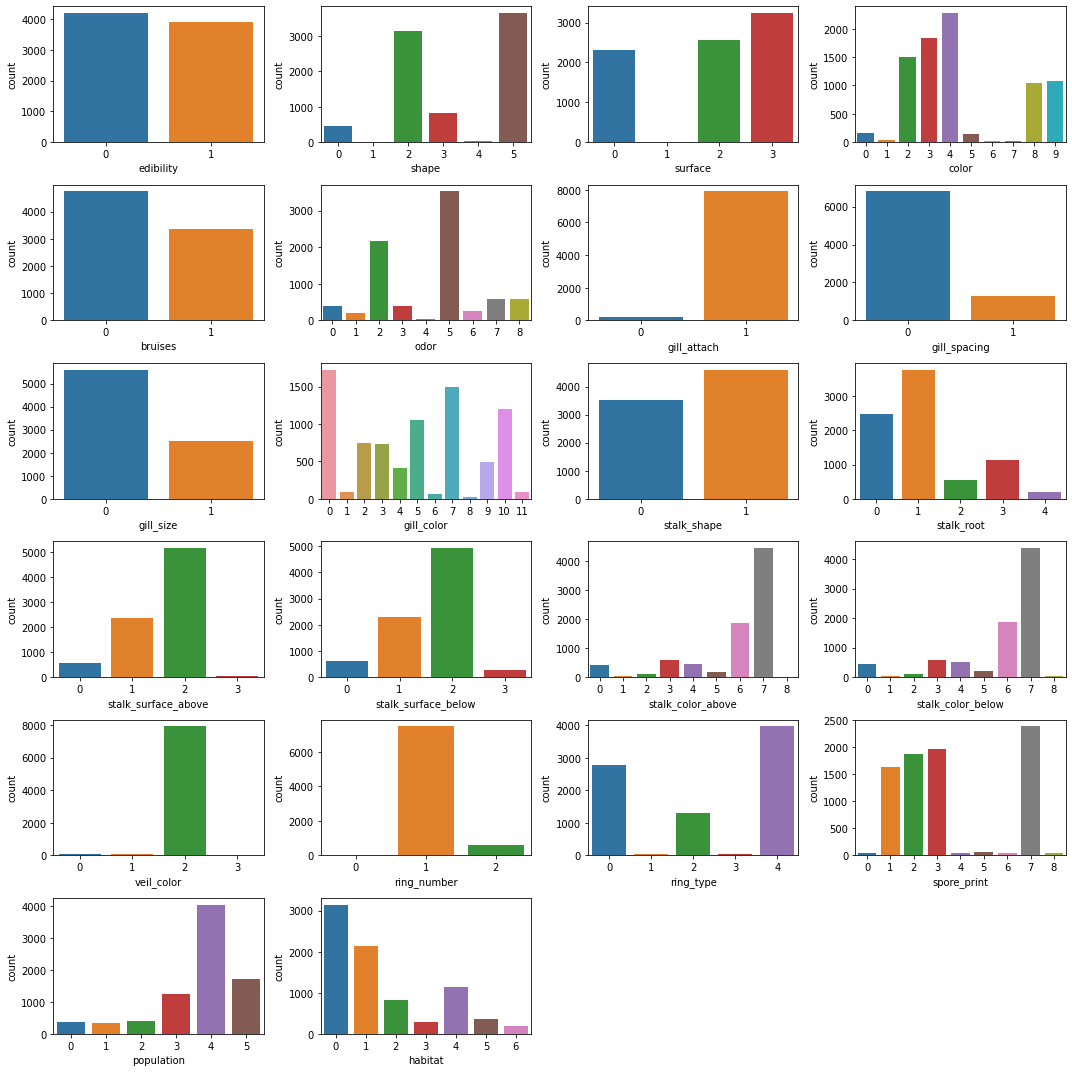

In [ ]:
#plot all the categorical data
fig, axes =plt.subplots(6,4, figsize=(15,15)) #, sharex=True
axes = axes.flatten()

#remove last two plot
axes.flat[-1].set_visible(False)
axes.flat[-2].set_visible(False)

object_bol = df.dtypes == 'object'

for ax, catplot in zip(axes, df2.dtypes[object_bol].index):
    sns.countplot(x=catplot, data=df2, ax=ax)

plt.tight_layout()  
#show the plot
plt.show()

We can see that all the columns name change into number and there is no veil type.

## Decision Tree + Random Forest Modeling & Select Model

### Feature selection

Since all the attributes are categorical, PCA will not be suitable for feature selection in this project. We can either use decision tree or randomforest to do feature selection. In this section, instead of using these two decision tree related method, We will introduce chi-squared statistic for feature selection. To use chi-square test，we also need to run labelencoder to the categorical variable. Then select K best function is to select the k lowest p-values based on chi2 Statistics. Thus p value gave the score of these relevant features.

 **Chi-Squared Feature Selection**

Feature 0: 75.111805
Feature 1: 26.480114
Feature 2: 8.406505
Feature 3: 43.965931
Feature 4: 63.273472
Feature 5: 27.856508
Feature 6: 142.662569
Feature 7: 58.197847
Feature 8: 57.374291
Feature 9: 233.150867
Feature 10: 87.583806
Feature 11: 167.110021
Feature 12: 27.889136
Feature 13: 24.933164
Feature 14: 22.933375
Feature 15: 22.280173
Feature 16: nan
Feature 17: 181.613508
Feature 18: 0.705147
Feature 19: 211.673659
Feature 20: 26.027192
Feature 21: 63.817035
Feature 22: 23.441219


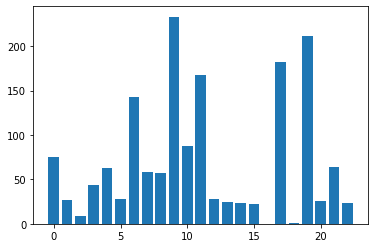

In [70]:
# load library
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	#x is all the attributes
	# y is our response variable
	X = dataset[:, :23]
	y = dataset[:,17]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection use chisquare testing
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/M11_Data.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Now, we have feature importance scores for each input features. feature 16 did not give output due to the fact we delete this features before we run the test. Then based on the score, we choose the following features:
- feature 0, which is edibility
- feature 6, which is gill_attach 
- feature 9, which is gill_color
- feature 10, which is stalk_shape
- feature 11, which is stalk_root  
- feature 19, which is ring_type       
- feature 21, which is population


Overall, we use chi-square, EDA and domain knowledge to select three sets of features. 
- chi-square: edibility, gill_attach, gill-color,stalk_shape, stalk-root, ring-type, and population.

- EDA:edibility, stalk_surface_above	, stalk_surface_below, gill size,bruises,ring number and habitat.

- domain knowledge: edibility, spore_print,habitat(sun light,water, etc)

By combine them, we finally decide to use these features:
- __First Model__-- 
We use EDA and domain knowlege to select these features: edibility, stalk_surface_above, stalk_surface_below, gill_size, bruises, spore_print, ring_number, and habitat.

- __Second Model__ -- 
For another model, we select features based on Chi square testing:
edibility, gill_attach, gill-color, stalk_shape, stalk-root, ring-type, and population.


In [72]:
from sklearn.preprocessing import LabelEncoder
new_df1 = df.edibility
new_df1= pd.concat([new_df1,df[['stalk_surface_above', 'stalk_surface_below', 
              'gill_size', 'bruises', 'spore_print', 'ring_number', 'habitat','veil_color']]],axis='columns')
new_df1
le_edibility = LabelEncoder() 
le_stalk_surface_above = LabelEncoder()   
le_stalk_surface_below = LabelEncoder()
le_gill_size = LabelEncoder()
le_bruises = LabelEncoder()
le_spore_print = LabelEncoder()
le_ring_number = LabelEncoder()
le_habitat = LabelEncoder()
le_veil_color = LabelEncoder()

new_df1['edibility'] = le_edibility.fit_transform(new_df1['edibility'])
new_df1['stalk_surface_below'] = le_stalk_surface_below.fit_transform(new_df1['stalk_surface_below'])        
new_df1['gill_size'] = le_gill_size.fit_transform(new_df1['gill_size'])
new_df1['stalk_surface_above'] = le_stalk_surface_above.fit_transform(new_df1['stalk_surface_above'])
new_df1['bruises'] = le_bruises.fit_transform(new_df1['bruises'])
new_df1['spore_print'] = le_spore_print.fit_transform(new_df1['spore_print'])
new_df1['ring_number'] = le_ring_number.fit_transform(new_df1['ring_number'])
new_df1['habitat'] = le_habitat.fit_transform(new_df1['habitat'])
new_df1['veil_color'] = le_veil_color.fit_transform(new_df1['veil_color'])
#new_df = new_df.drop(['gill_spacing','stalk_surface_above','veil_color'],axis='columns') 

new_df1.head()

,edibility,stalk_surface_above,stalk_surface_below,gill_size,bruises,spore_print,ring_number,habitat,veil_color
0,1,2,2,1,1,2,1,5,2
1,0,2,2,0,1,3,1,1,2
2,0,2,2,0,1,3,1,3,2
3,1,2,2,1,1,2,1,5,2
4,0,2,2,0,0,3,1,1,2


In [73]:
# model 1 --- explanatory variables from EDA and domain knowlege 
from sklearn.model_selection import train_test_split

X1 = new_df1[['edibility', 'stalk_surface_above', 'stalk_surface_below', 'gill_size', 'bruises', 'spore_print', 'ring_number', 'habitat']]
y = new_df1['veil_color']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, shuffle=True,random_state=2020)

In [75]:
from sklearn.preprocessing import LabelEncoder
new_df2 = df.edibility
new_df2= pd.concat([new_df2,df[['population', 'gill_attach', 'gill_color', 
                'stalk_shape', 'stalk_root', 'ring_type', 'veil_color']]],axis='columns')
new_df2
le_edibility = LabelEncoder()
le_population = LabelEncoder()    
le_gill_attach = LabelEncoder()
le_gill_color = LabelEncoder()
le_stalk_shape = LabelEncoder()
le_stalk_root = LabelEncoder()
le_ring_type = LabelEncoder()
le_population = LabelEncoder()
le_veil_color = LabelEncoder()

new_df2['edibility'] = le_edibility.fit_transform(new_df2['edibility'])
new_df2['population'] = le_population.fit_transform(new_df2['population'])
new_df2['gill_attach'] = le_gill_attach.fit_transform(new_df2['gill_attach'])        
new_df2['gill_color'] = le_gill_color.fit_transform(new_df2['gill_color'])
new_df2['stalk_shape'] = le_stalk_shape.fit_transform(new_df2['stalk_shape'])
new_df2['stalk_root'] = le_stalk_root.fit_transform(new_df2['stalk_root'])
new_df2['ring_type'] = le_ring_type.fit_transform(new_df2['ring_type'])
new_df2['population'] = le_population.fit_transform(new_df2['population'])
new_df2['veil_color'] = le_veil_color.fit_transform(new_df2['veil_color'])
#new_df = new_df.drop(['gill_spacing','stalk_surface_above','veil_color'],axis='columns') 

new_df2.head()

,edibility,population,gill_attach,gill_color,stalk_shape,stalk_root,ring_type,veil_color
0,1,3,1,4,0,3,4,2
1,0,2,1,4,0,2,4,2
2,0,2,1,5,0,2,4,2
3,1,3,1,5,0,3,4,2
4,0,0,1,4,1,3,0,2


In [77]:
# model 2 --- explanatory variables from chi square
from sklearn.model_selection import train_test_split

X2 = new_df2[['edibility', 'gill_attach', 'gill_color', 'stalk_shape', 'stalk_root', 'ring_type', 'population']] 
y = new_df2['veil_color']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, shuffle=True,random_state=2020)

After we got preparation for building models, now we can start the decision tree and random forest

### Decision Tree

We do not want each simulation gave different result so we set random state as certain value. 
Although a larger max depth value can give a higher accuracy, this higher value also provide higher risks of overfitting. For the sake of performance and low-risk, Max depth value is set at 5 .

__Decison Tree model 1__ 

In [78]:
import time
start = time.time()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X1_train , y1_train)
DTpred1 = dt_clf.predict(X1_test)
probablility = dt_clf.predict_proba(X1_test)

print('type the predict:\n',DTpred1) #output is the type the predict
print('\nprobablility of every type:\n',probablility)   #output is the probablility of every type

type the predict:
 [2 2 2 ... 2 2 2]

probablility of every type:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [79]:
end = time.time()
running_time = end-start
print('DecisionTree-1 time cost : %.5f sec' %running_time)

DecisionTree-1 time cost : 3.84380 sec


In [80]:
# count result 
unique, counts = np.unique(DTpred1, return_counts=True)
dict(zip(unique, counts))

{0: 12, 1: 11, 2: 1601, 3: 1}

In [81]:
# return orig value
from sklearn import preprocessing
le_veil_color.inverse_transform(DTpred1) 

array(['w', 'w', 'w', ..., 'w', 'w', 'w'], dtype=object)

In [82]:
print('DecisionTreeClassifier basic hyperparameters:\n', dt_clf.get_params())

DecisionTreeClassifier basic hyperparameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}


In [113]:
from sklearn.model_selection import cross_val_score
# evaluate the model using 10-fold cross-validation
# we use k value of 10 for its relatively low
scores = cross_val_score(dt_clf, X1_train , y1_train, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

SyntaxError: ignored

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y1_test,DTpred1))
print(classification_report(y1_test,DTpred1))

[[   5    7    9    0]
 [   7    4    7    0]
 [   0    0 1585    0]
 [   0    0    0    1]]
              precision    recall  f1-score   support

           0       0.42      0.24      0.30        21
           1       0.36      0.22      0.28        18
           2       0.99      1.00      0.99      1585
           3       1.00      1.00      1.00         1

    accuracy                           0.98      1625
   macro avg       0.69      0.62      0.64      1625
weighted avg       0.98      0.98      0.98      1625



Visualizing


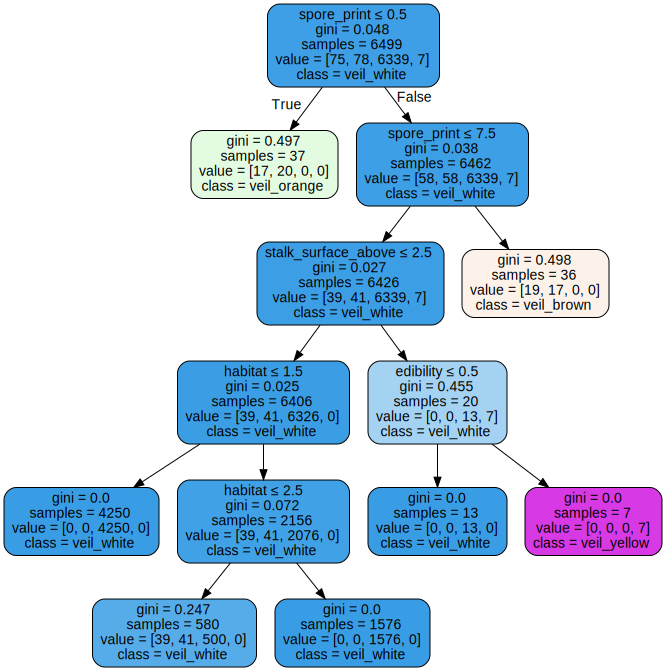

In [84]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz 

#path = 'https://github.com/zhijing-zhang/DAV6150/tree/master/Dataset' 
dot_data = export_graphviz(dt_clf,
        #out_file=os.path.join(path, "decision_tree"),
        out_file=None,
        feature_names=['edibility', 'stalk_surface_above', 'stalk_surface_below', 'gill_size', 'bruises', 'spore_print', 'ring_number', 'habitat'], 
        class_names=['veil_brown','veil_orange','veil_white','veil_yellow'],#brown=n,orange=o,white=w,yellow=y
        rounded=True,
        filled=True,
        special_characters=True)
graph = graphviz.Source(dot_data)
graph
#graph.render(filename='MyPicture',view=True) 
#graph.render("new_df")  
#Source.from_file(os.path.join(path, "decision_tree.dot"))


Obviously, the result of 'white' can be seen.

__Decision Tree model 2__

In [90]:
import time
start = time.time()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_clf.fit(X2_train , y2_train)

DTpred2 = dt_clf.predict(X2_test)

probablility = dt_clf.predict_proba(X2_test)

print('type the predict:\n',DTpred2) #output is the type the predict
print('\nprobablility of every type:\n',probablility)   #output is the probablility of every type

type the predict:
 [2 2 2 ... 2 2 2]

probablility of every type:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [91]:
end = time.time()
running_time = end-start
print('DecisionTree-2 time cost : %.5f sec' %running_time)

DecisionTree-2 time cost : 2.68173 sec


In [92]:
# count result 
unique, counts = np.unique(DTpred2, return_counts=True)
dict(zip(unique, counts))

{0: 17, 1: 22, 2: 1585, 3: 1}

In [93]:
# return orig value
from sklearn import preprocessing
le_veil_color.inverse_transform(DTpred1)

array(['w', 'w', 'w', ..., 'w', 'w', 'w'], dtype=object)

In [94]:
print('DecisionTreeClassifier basic hyperparameters:\n', dt_clf.get_params())

DecisionTreeClassifier basic hyperparameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}


In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y1_test,DTpred2))
print(classification_report(y1_test,DTpred2))

[[   7   14    0    0]
 [  10    8    0    0]
 [   0    0 1585    0]
 [   0    0    0    1]]
              precision    recall  f1-score   support

           0       0.41      0.33      0.37        21
           1       0.36      0.44      0.40        18
           2       1.00      1.00      1.00      1585
           3       1.00      1.00      1.00         1

    accuracy                           0.99      1625
   macro avg       0.69      0.69      0.69      1625
weighted avg       0.99      0.99      0.99      1625



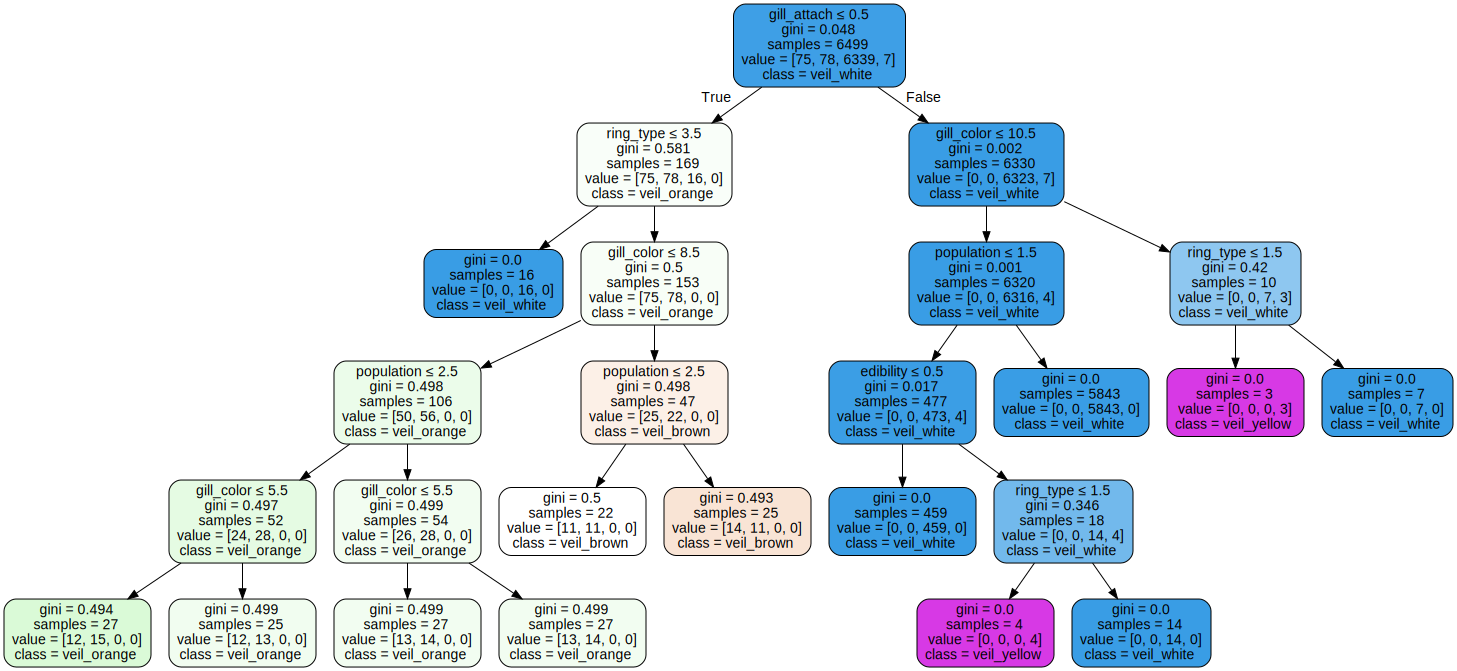

In [96]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz 

#path = 'https://github.com/zhijing-zhang/DAV6150/tree/master/Dataset' 
dot_data = export_graphviz(dt_clf,
        #out_file=os.path.join(path, "decision_tree"),
        out_file=None,
        feature_names=['edibility', 'gill_attach', 'gill_color', 'stalk_shape', 'stalk_root', 'ring_type', 'population'], 
        class_names=['veil_brown','veil_orange','veil_white','veil_yellow'],#brown=n,orange=o,white=w,yellow=y
        rounded=True,
        filled=True,
        special_characters=True)
graph = graphviz.Source(dot_data)
graph
#graph.render(filename='MyPicture',view=True) 
#graph.render("new_df")  
#Source.from_file(os.path.join(path, "decision_tree.dot"))

### Random Forest

We also compare the relevent between the BaggingClassifier and RandomForestClassifier.

In sklearn if we bag decision trees, we still end up using all features with each decision tree. In random forests however, we use a subset of features. Therefore, here we put the BaggingClassifier() before random forest. 

__Bagging model 1__ 

In [97]:
# Bagging ensembles- model1
import time
start = time.time()

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42), 
    n_estimators=500, max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X1_train, y1_train)
BEpred1 = bag_clf.predict(X1_test)

end = time.time()
running_time = end-start
print('Bagging-1 time cost : %.5f sec' %running_time)

Bagging-1 time cost : 1.07270 sec


In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y1_test,BEpred1))
print(classification_report(y1_test,BEpred1))

[[  10    7    4    0]
 [   9    4    5    0]
 [   0    0 1585    0]
 [   0    0    1    0]]
              precision    recall  f1-score   support

           0       0.53      0.48      0.50        21
           1       0.36      0.22      0.28        18
           2       0.99      1.00      1.00      1585
           3       0.00      0.00      0.00         1

    accuracy                           0.98      1625
   macro avg       0.47      0.42      0.44      1625
weighted avg       0.98      0.98      0.98      1625



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


__Bagging model 2__

In [99]:
# Bagging ensembles-model2
import time
start = time.time()

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42), 
    n_estimators=500, max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X2_train, y2_train)
BEpred2 = bag_clf.predict(X2_test)

end = time.time()
running_time = end-start
print('Bagging-2 time cost : %.5f sec' %running_time)

Bagging-2 time cost : 1.02411 sec


In [100]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y1_test,BEpred2))
print(classification_report(y1_test,BEpred2))

[[   7   14    0    0]
 [  10    8    0    0]
 [   2    0 1583    0]
 [   0    0    1    0]]
              precision    recall  f1-score   support

           0       0.37      0.33      0.35        21
           1       0.36      0.44      0.40        18
           2       1.00      1.00      1.00      1585
           3       0.00      0.00      0.00         1

    accuracy                           0.98      1625
   macro avg       0.43      0.44      0.44      1625
weighted avg       0.98      0.98      0.98      1625



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Then we use RandomForestClassifier() 
__RandomForest model 1__

In [101]:
# RandomForest -model1
import time
start = time.time()

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X1_train, y1_train)
RFpred1 = rnd_clf.predict(X1_test)

end = time.time()
running_time = end-start
print('RandomForest-2 time cost : %.5f sec' %running_time)

RandomForest-2 time cost : 1.14937 sec


In [102]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y1_test,RFpred1))
print(classification_report(y1_test,RFpred1))

[[   9   12    0    0]
 [  12    6    0    0]
 [   0    0 1585    0]
 [   0    0    0    1]]
              precision    recall  f1-score   support

           0       0.43      0.43      0.43        21
           1       0.33      0.33      0.33        18
           2       1.00      1.00      1.00      1585
           3       1.00      1.00      1.00         1

    accuracy                           0.99      1625
   macro avg       0.69      0.69      0.69      1625
weighted avg       0.99      0.99      0.99      1625



__RandomForest model 2__

In [103]:
# RandomForest -model2
import time
start = time.time()

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X2_train, y2_train)
RFpred2 = rnd_clf.predict(X2_test)
end = time.time()
running_time = end-start
print('RandomForest-2 time cost : %.5f sec' %running_time)

RandomForest-2 time cost : 1.16321 sec


In [104]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y1_test,RFpred2))
print(classification_report(y1_test,RFpred2))

[[   7   14    0    0]
 [  10    8    0    0]
 [   0    0 1585    0]
 [   0    0    0    1]]
              precision    recall  f1-score   support

           0       0.41      0.33      0.37        21
           1       0.36      0.44      0.40        18
           2       1.00      1.00      1.00      1585
           3       1.00      1.00      1.00         1

    accuracy                           0.99      1625
   macro avg       0.69      0.69      0.69      1625
weighted avg       0.99      0.99      0.99      1625



## Select Model

In [ ]:
# print table
'''
mix = {'value type': ['0','0','0','1','1','1'],
             'matrics': ["precision",'recall','f1-score',"precision",'recall','f1-score'],
            'model1': ['0.61','0.59','0.60','0.61','0.62','0.61'],
            'model2': ['0.56','0.84','0.67','0.69','0.34','0.45'],
             'model3': ['0.66','0.64','0.65','0.66','0.67','0.66']             
            }

df = pd.DataFrame(mix, columns= ['value type','matrics','model1','model2','model3'])

pivot = df.pivot_table(index=['matrics','value type'], values=['model1','model2','model3'], aggfunc='sum')
print (pivot)
'''

## Conclusions

Based on our results, model gave us better result, we assumed that the reason was due to 

## Reference

1. https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html 

2. https://en.wikipedia.org/wiki/Goodness_of_fit

3. https://www.canr.msu.edu/resources/dont_pick_poison_when_gathering_mushrooms_for_food_in_michigan_e2777
